In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

NOW WE LOAD THE DATASETS FROM LOCAL FILE PATH

In [170]:
Churn_Data = pd.read_csv('churn_dataset.csv')

NOW WE TRY TO SEE IF IT'S CORRECTLY UPLOADED OR NOT

In [171]:
Churn_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
Churn_Data.shape

(7043, 21)

In [173]:
Churn_Data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [174]:
Churn_Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [175]:
Churn_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


FROM THIS WE CAN SAY:
>AS SENIOR CITIZEN IS CATEGORICAL VALUE 25% TO 75% DISTRIBUTION NOT RIGHT
>55 MONTHS IS THE MOST TENURE FOR OVER 3/4TH CUSTOMER
>AVG MONTHLY CHARGE IS USD 64.8  BUT  50% CUSTOMER PAYS MORE THAN USD 70.3 EVERY MONTH WHICH IS A GOOD SIGN

Text(0.5, 1.02, 'Count of Target Variable per category')

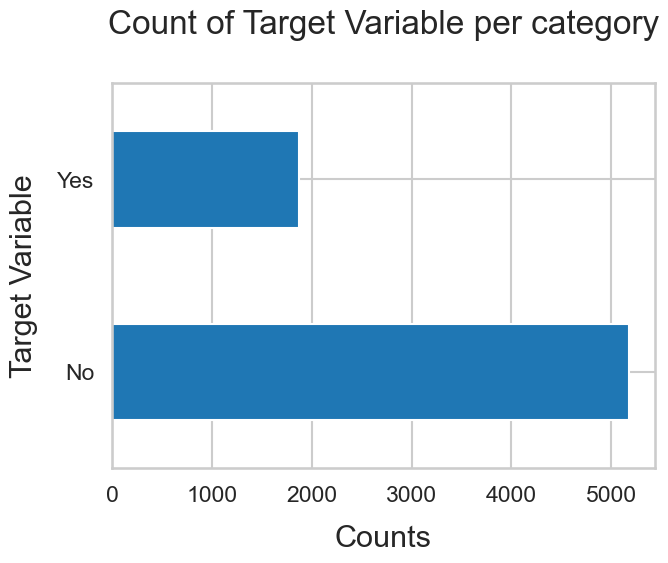

In [176]:
Churn_Data['Churn'].value_counts().plot(kind='barh',figsize=(7,5))
plt.xlabel("Counts",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title('Count of Target Variable per category',y=1.02)

In [177]:
100*Churn_Data['Churn'].value_counts()/len(Churn_Data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [178]:
Churn_Data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

FROM THIS WE CAN LEARN:
>DATA DIFFERENCE RATIO IS PRETTY HIGH i.e. 73:27
>So We need to divide the data by values and proceed further into analysis to get insights

In [179]:
#now we see the concise summary of the dataframe and we are using verbose = true here to make it nicer and readable as it has many columns
Churn_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


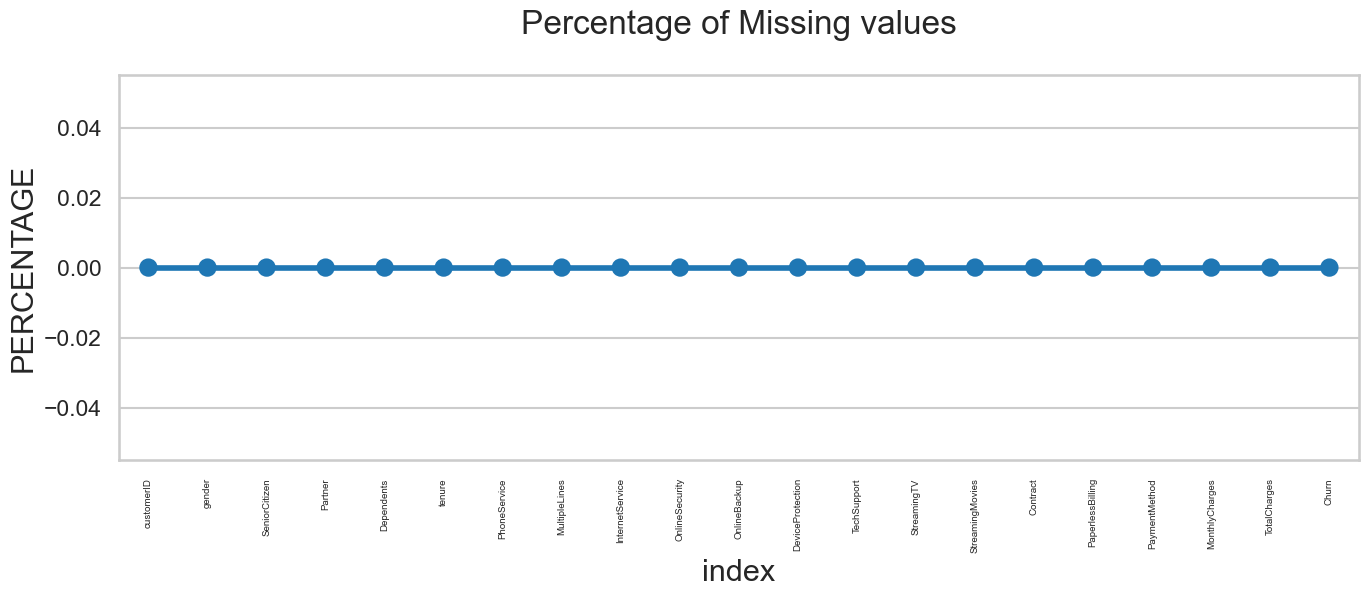

In [180]:
missing=pd.DataFrame((Churn_Data.isnull().sum())*100/Churn_Data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


SO FROM HERE WE CAN SEE THAT WE DON'T HAVE ANY MISSING DATA

1. Creating a copy of main data for manipulation and processing.

In [181]:
Tel_Churn = Churn_Data.copy()

2.Total Charges should be numeric amount so converting it into numeric data type.

In [182]:
Tel_Churn.TotalCharges = pd.to_numeric(Tel_Churn.TotalCharges,errors='coerce')
Tel_Churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3.After seeing 11 missing values in TotalCharges column; Let's check these records

In [183]:
Tel_Churn.loc[Tel_Churn['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4.Missing Value Treatment:-
>Since the % of these records compared to dataset is very low i.e. 0.15%, it is safe to ignore them from further processing.

In [184]:
#Removing missing values
Tel_Churn.dropna(how='any',inplace=True)

5.Dividing customers into bins based on tenure e.g. for tenure <12 months to 1,12 and respectively...

In [185]:
#first getting the max tenure
print(Tel_Churn['tenure'].max())

72


In [186]:
#then we group the tenures to bins of 12 months:
labels = ["{0}-{1}".format(i,i+11)for i in range(1,72,12)]
Tel_Churn['tenure_grp']=pd.cut(Tel_Churn.tenure,range(1,80,12),right=False,labels=labels)
Tel_Churn['tenure_grp'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_grp, dtype: int64

6.Now we drop the columns which are not needed for further processing in the dataset.

In [187]:
Tel_Churn.drop(columns= ['customerID','tenure'], axis=1 ,inplace=True)

In [188]:
Tel_Churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


1. Plotting distribution of individual predictions by Churn.

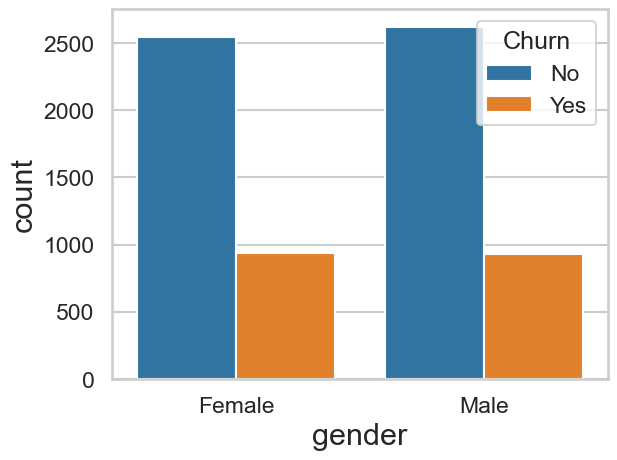

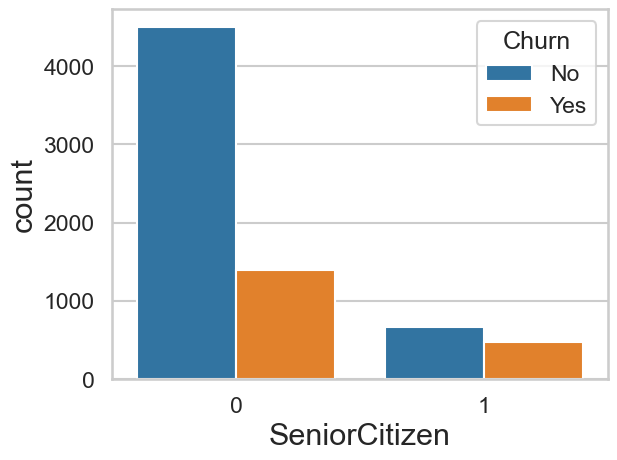

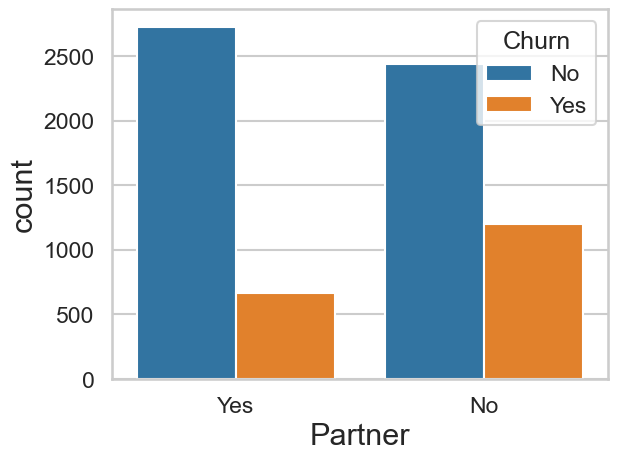

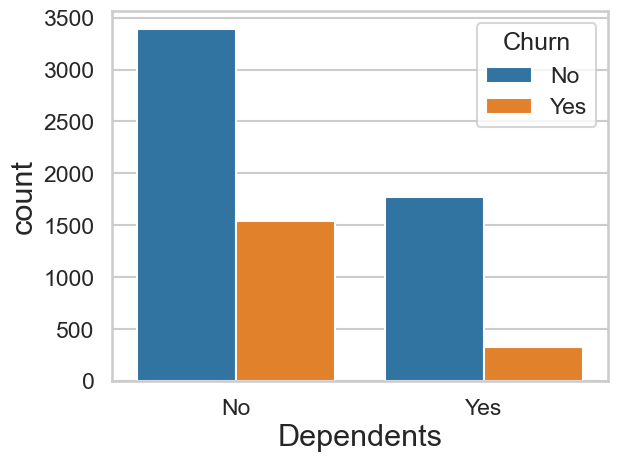

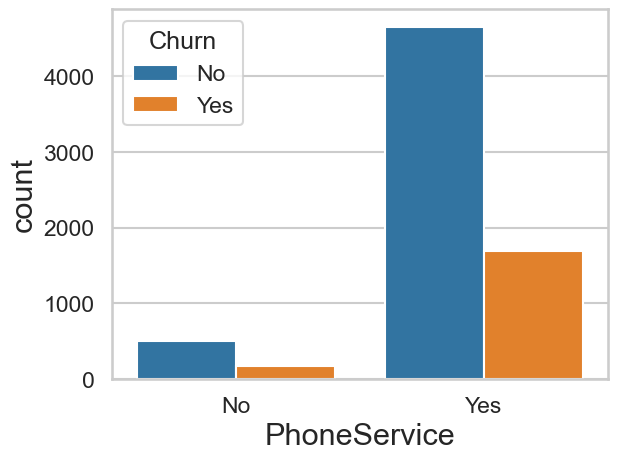

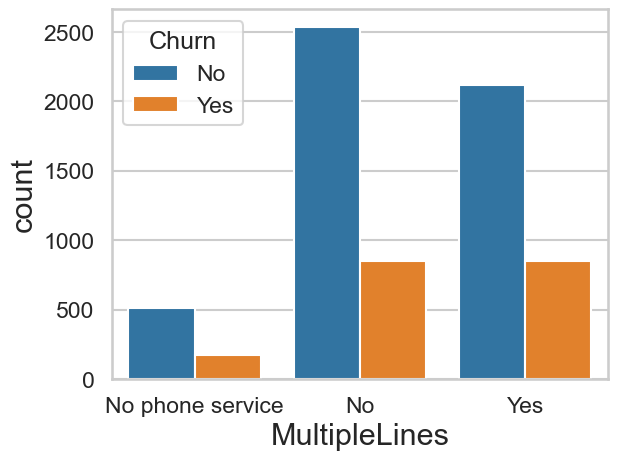

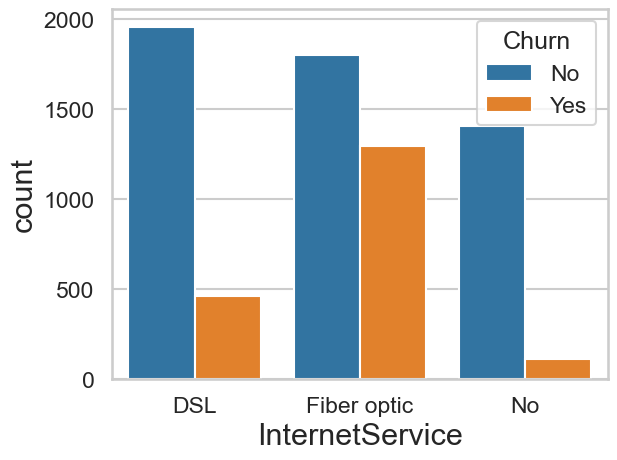

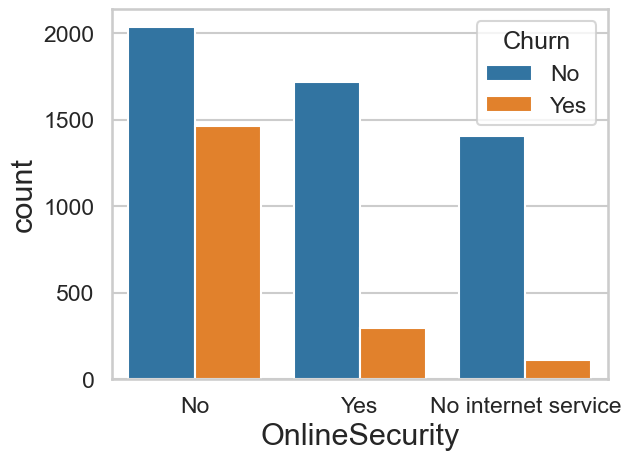

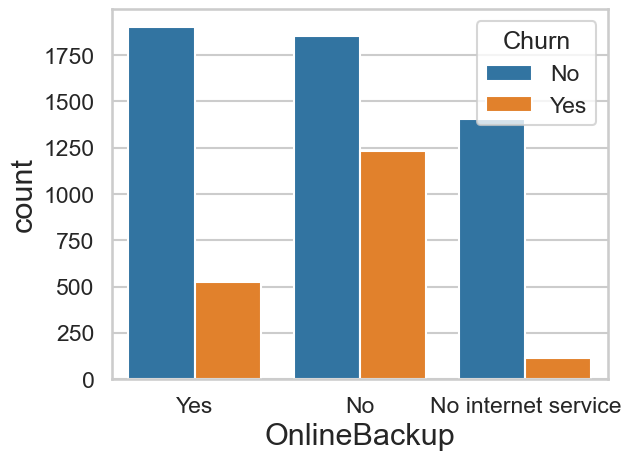

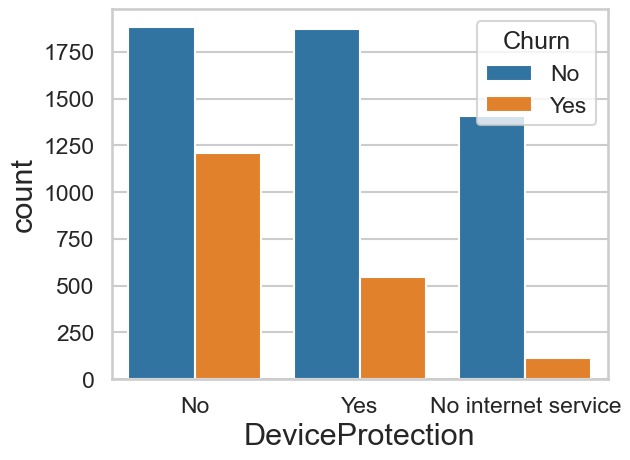

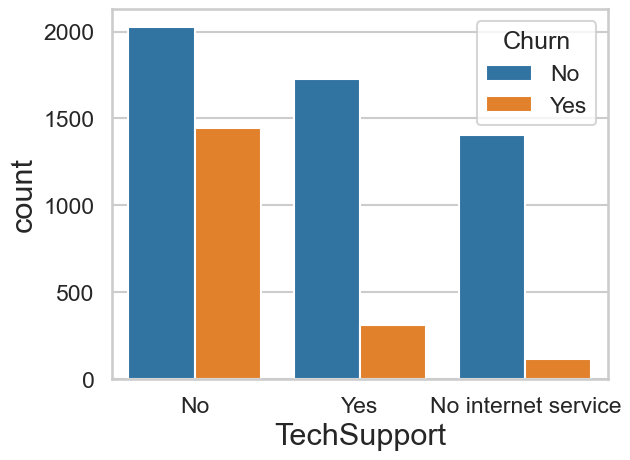

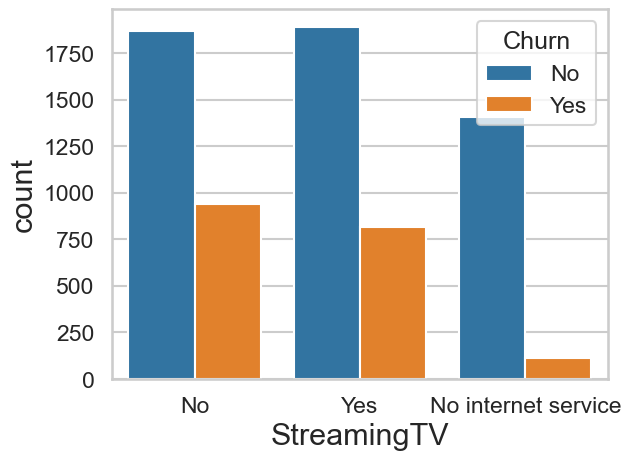

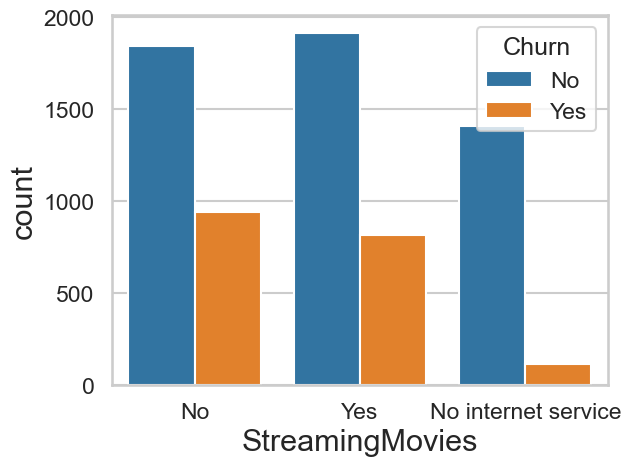

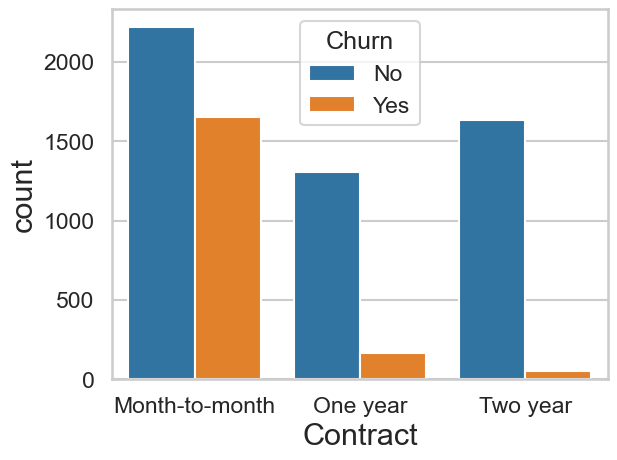

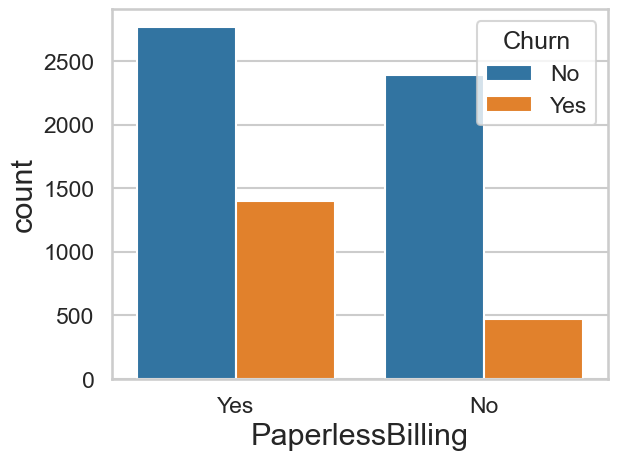

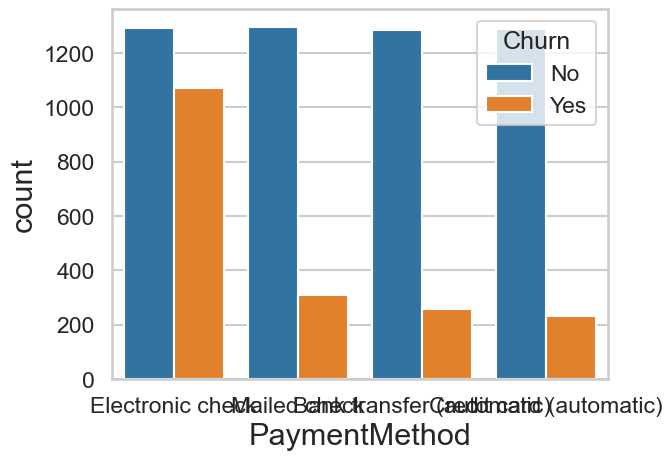

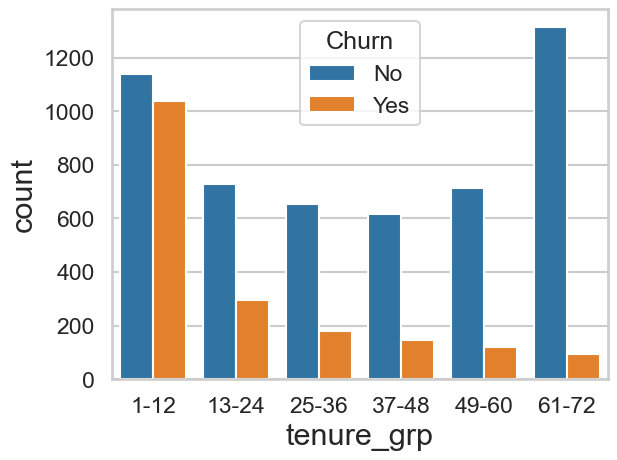

In [189]:
for i, predictor in enumerate(Tel_Churn.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=Tel_Churn,x=predictor,hue='Churn')

2.Converting the target variable Churn in a binary numeric variable:

In [190]:
Tel_Churn['Churn']=np.where(Tel_Churn.Churn=='Yes',1,0)
Tel_Churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


3.Converting all the categorical variables into dummy variables:

In [191]:
Tel_Churn_dummies = pd.get_dummies(Tel_Churn)
Tel_Churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


4.Relationship between Monthly and Total charges:

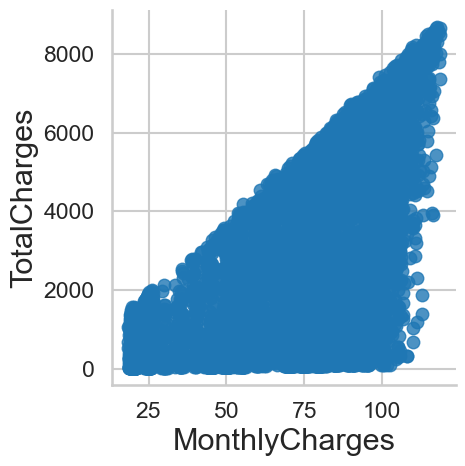

In [192]:
sns.lmplot(data=Tel_Churn_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

FROM THIS WE CAN SEE THAT TOTAL CHARGES INCREASE WITH THE INCREASE IN MONTHLY CHARGE AS EXPECTED.

5.Churn by Monthly Charges and Total Charges:

C:\Users\91771\AppData\Local\Temp\ipykernel_12080\758537394.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mtc = sns.kdeplot(Tel_Churn_dummies.MonthlyCharges[(Tel_Churn_dummies['Churn']==0)],color='Red',shade=True)
C:\Users\91771\AppData\Local\Temp\ipykernel_12080\758537394.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mtc = sns.kdeplot(Tel_Churn_dummies.MonthlyCharges[(Tel_Churn_dummies['Churn']==1)],ax=Mtc,color='Blue',shade=True)


Text(0.5, 1.0, 'Churn By Monthly Charges')

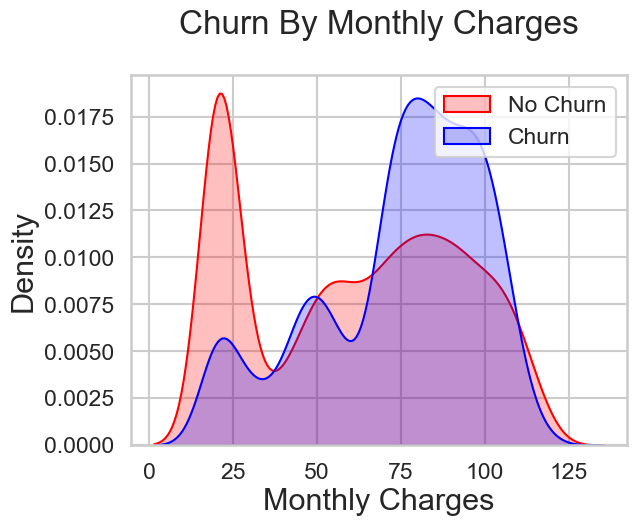

In [193]:
Mtc = sns.kdeplot(Tel_Churn_dummies.MonthlyCharges[(Tel_Churn_dummies['Churn']==0)],color='Red',shade=True)
Mtc = sns.kdeplot(Tel_Churn_dummies.MonthlyCharges[(Tel_Churn_dummies['Churn']==1)],ax=Mtc,color='Blue',shade=True)
Mtc.legend(["No Churn","Churn"],loc='upper right')
Mtc.set_ylabel('Density')
Mtc.set_xlabel('Monthly Charges')
Mtc.set_title('Churn By Monthly Charges')

C:\Users\91771\AppData\Local\Temp\ipykernel_12080\1190396366.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Ttc = sns.kdeplot(Tel_Churn_dummies.TotalCharges[(Tel_Churn_dummies['Churn']==0)],color='Red',shade=True)
C:\Users\91771\AppData\Local\Temp\ipykernel_12080\1190396366.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Ttc = sns.kdeplot(Tel_Churn_dummies.TotalCharges[(Tel_Churn_dummies['Churn']==1)],ax=Ttc,color='Blue',shade=True)


Text(0.5, 1.0, 'Churn By Total Charges')

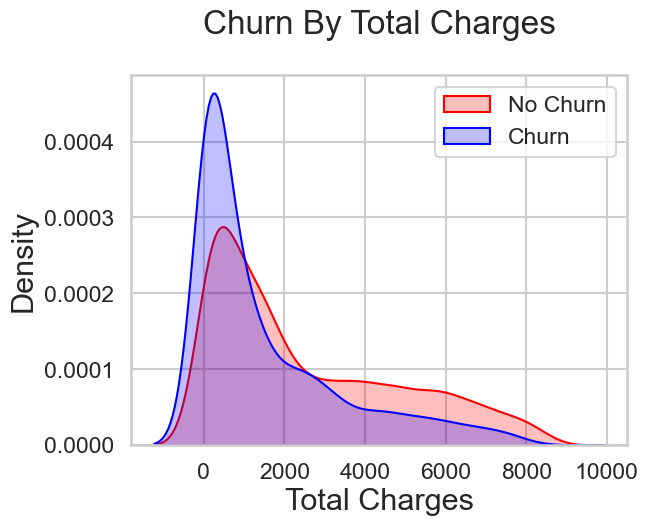

In [194]:
Ttc = sns.kdeplot(Tel_Churn_dummies.TotalCharges[(Tel_Churn_dummies['Churn']==0)],color='Red',shade=True)
Ttc = sns.kdeplot(Tel_Churn_dummies.TotalCharges[(Tel_Churn_dummies['Churn']==1)],ax=Ttc,color='Blue',shade=True)
Ttc.legend(["No Churn","Churn"],loc='upper right')
Ttc.set_ylabel('Density')
Ttc.set_xlabel('Total Charges')
Ttc.set_title('Churn By Total Charges')

FROM HERE WE CAN SEE THAT PEOPLE WITH LOWER MONTHLY CHARGES WON'T CHURN MOSTLY WHEREAS TOTAL CHARGES PLOT TELL US THAT CHURNERS HAVE OTHER FACTORS BEHIND CHURNING AS BOTH CHURNERS AND NON CHURNERS ARE CENTERED AROUND LOWER TOTAL CHARGES.

6.Building a corelation of all predictors with Churn:

<AxesSubplot: >

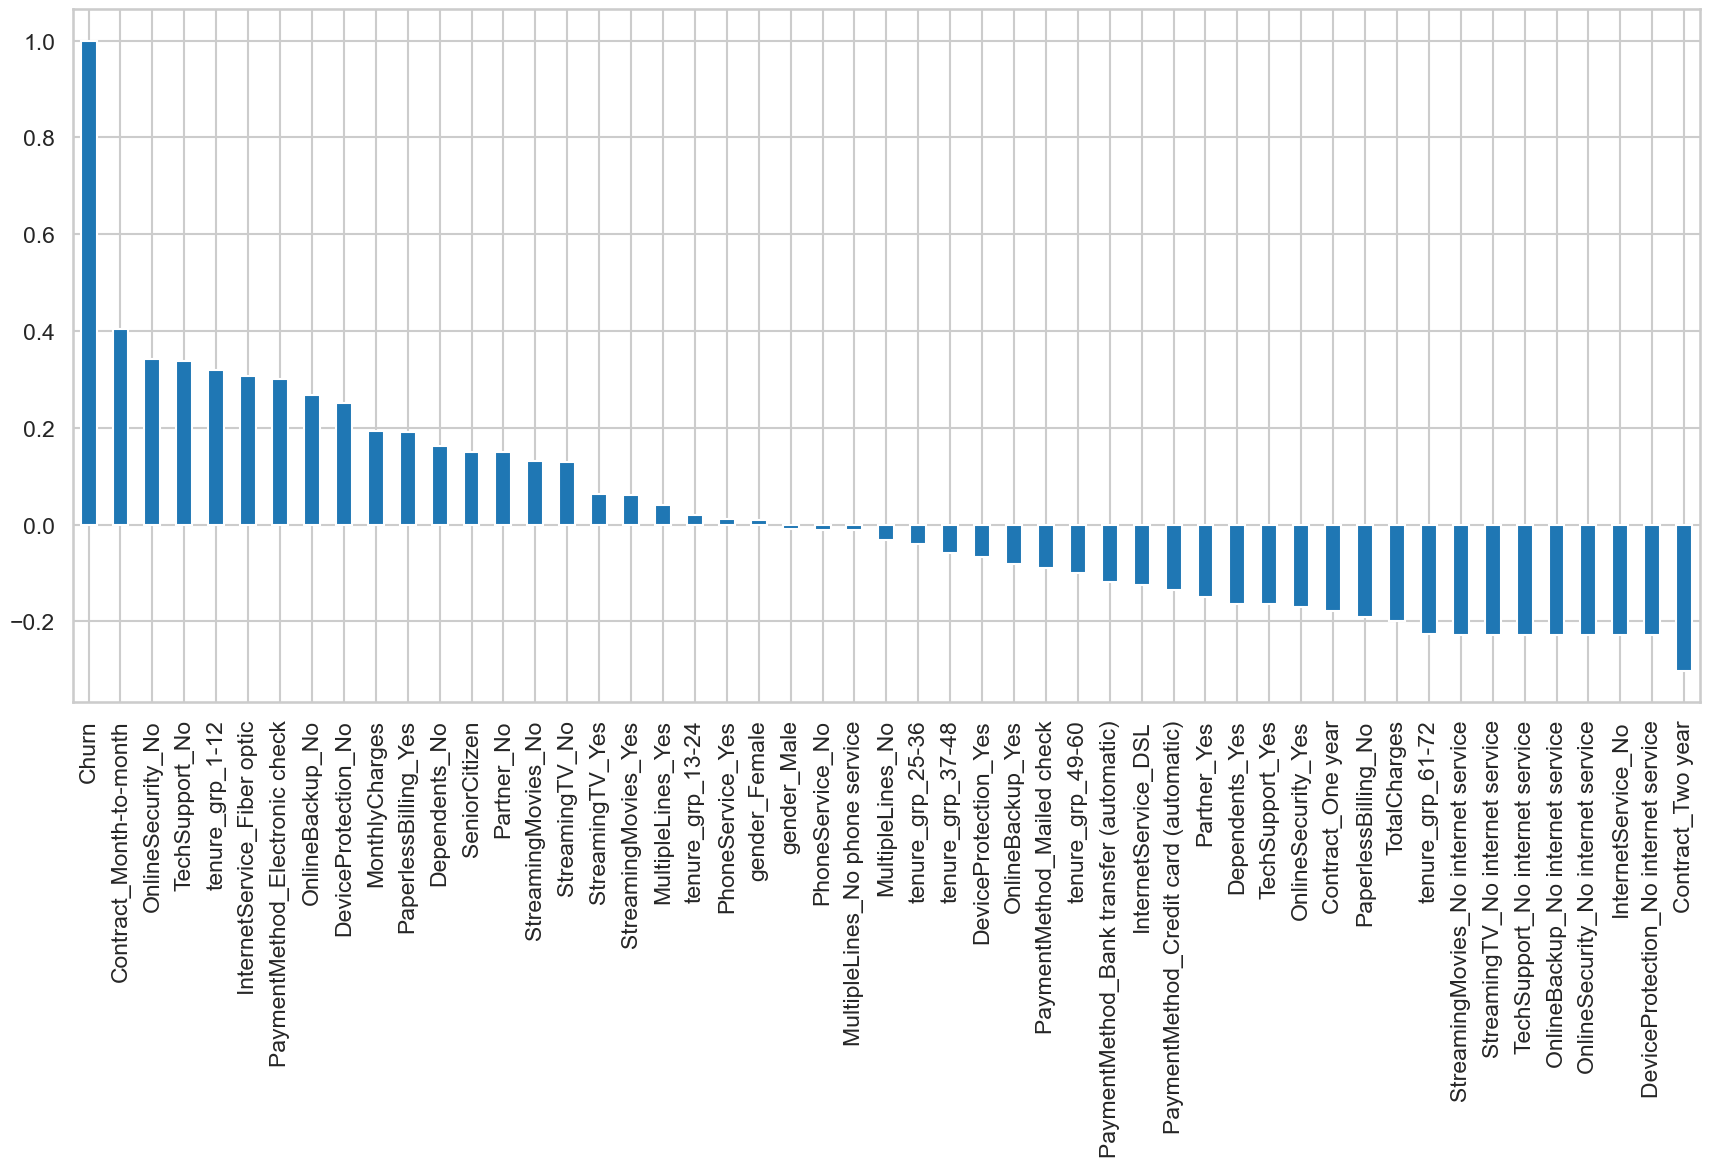

In [195]:
plt.figure(figsize=(21,9))
Tel_Churn_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Insights Derived:

>HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

>LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

>Factors like Gender, Availability of PhoneService of multiple lines have almost NO impact on Churn

>See the heatmap below for further check

<AxesSubplot: >

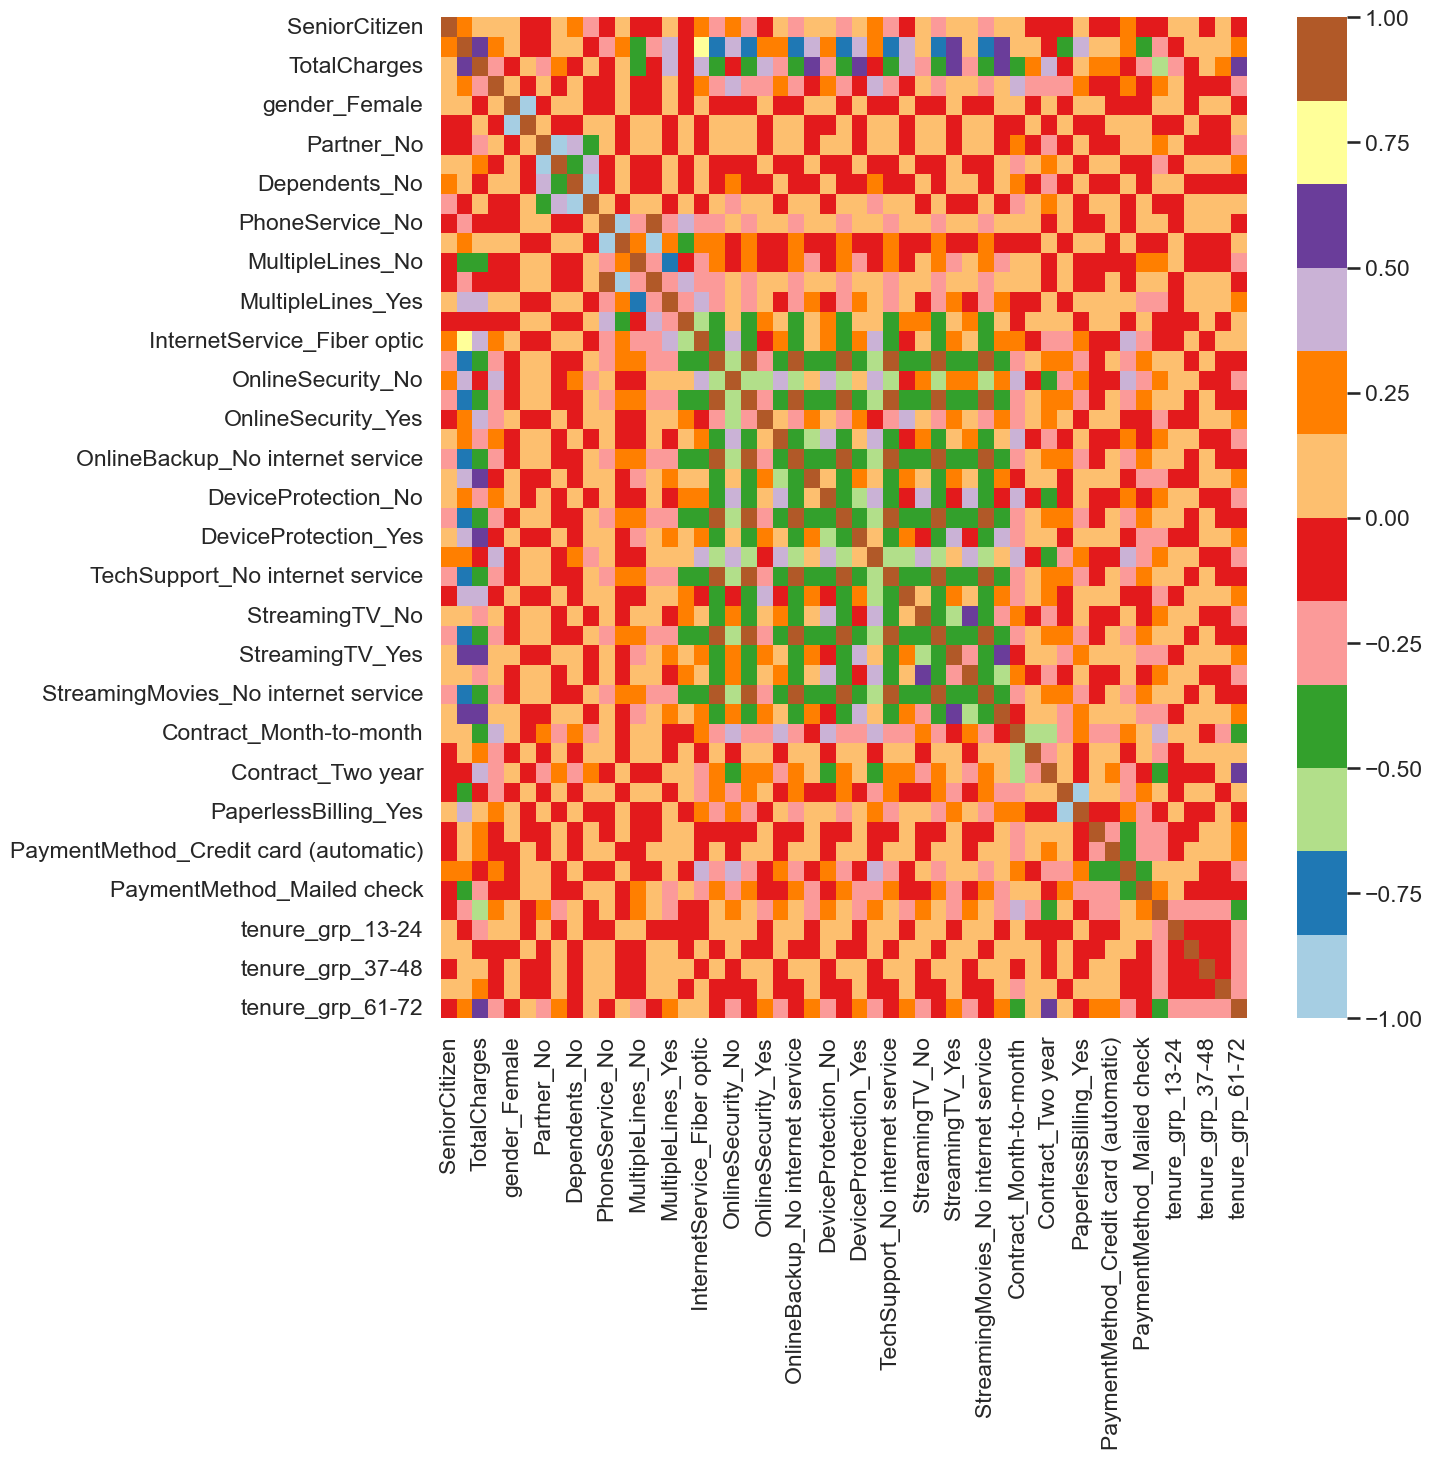

In [196]:
plt.figure(figsize=(13,13))
sns.heatmap(Tel_Churn_dummies.corr(),cmap='Paired')

In [197]:
new_df1_target0 = Tel_Churn.loc[Tel_Churn['Churn']==0]
new_df1_target1 = Tel_Churn.loc[Tel_Churn['Churn']==1]

>Now we create a function for using it on further plots:

In [198]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=22
    plt.rcParams['axes.titlesize']=24
    plt.rcParams['axes.titlepad']=30
    temp=pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

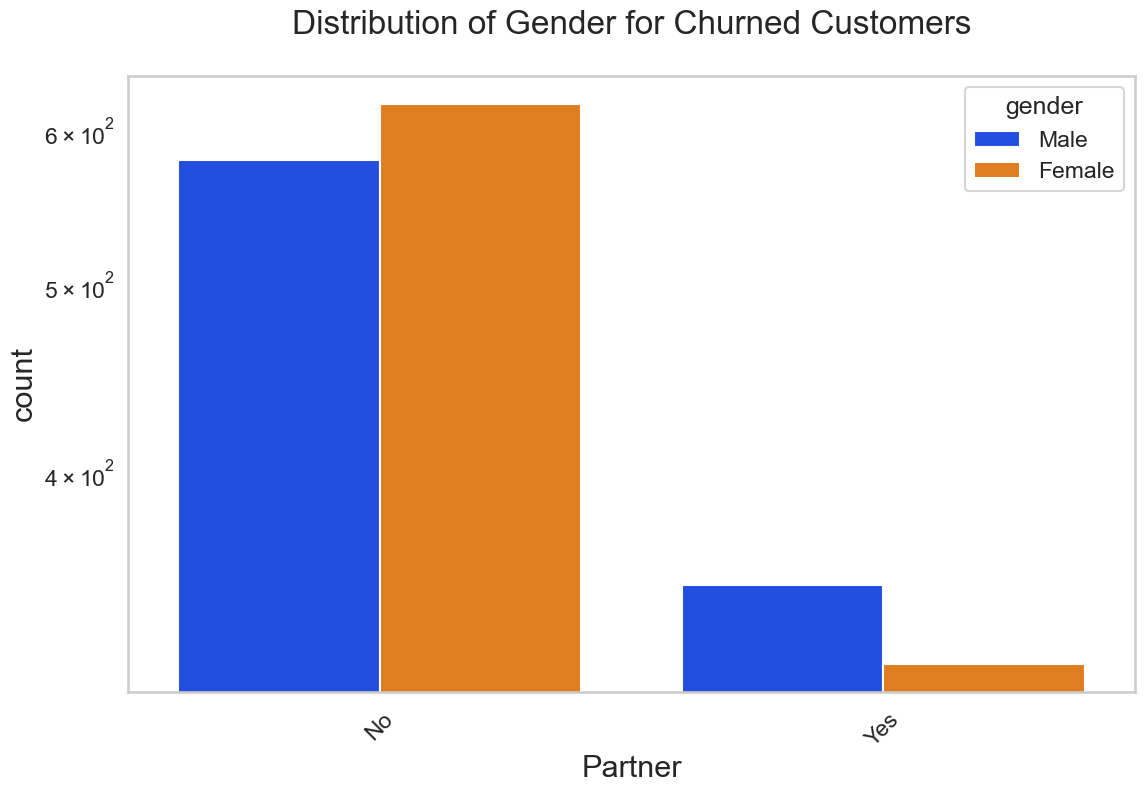

In [199]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

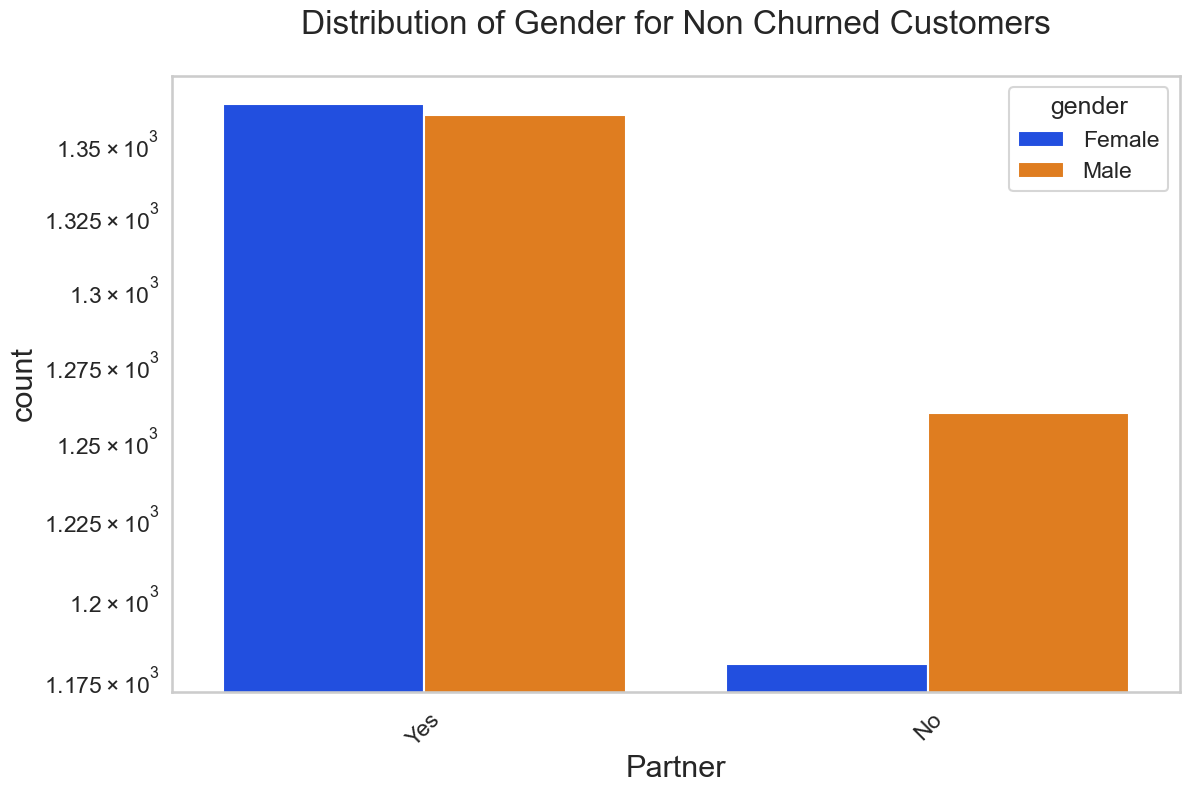

In [200]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

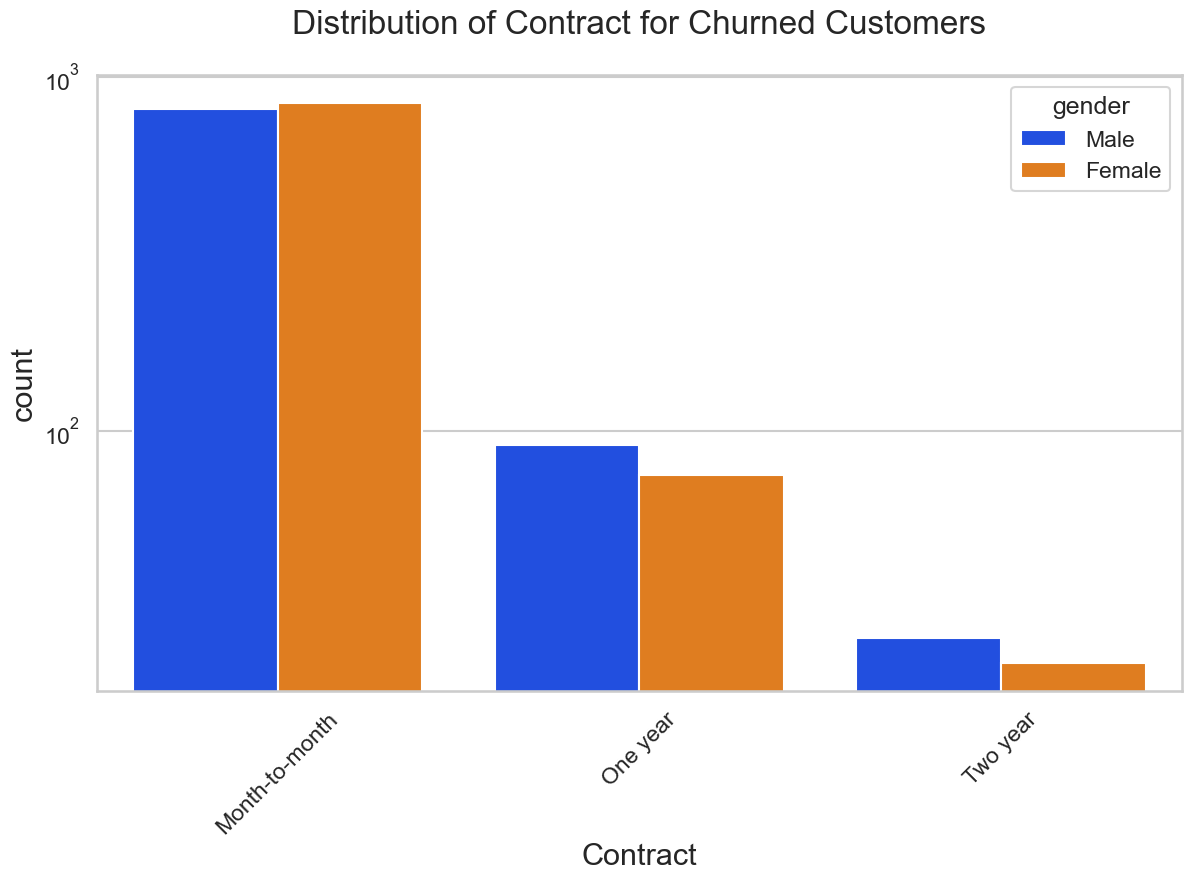

In [201]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

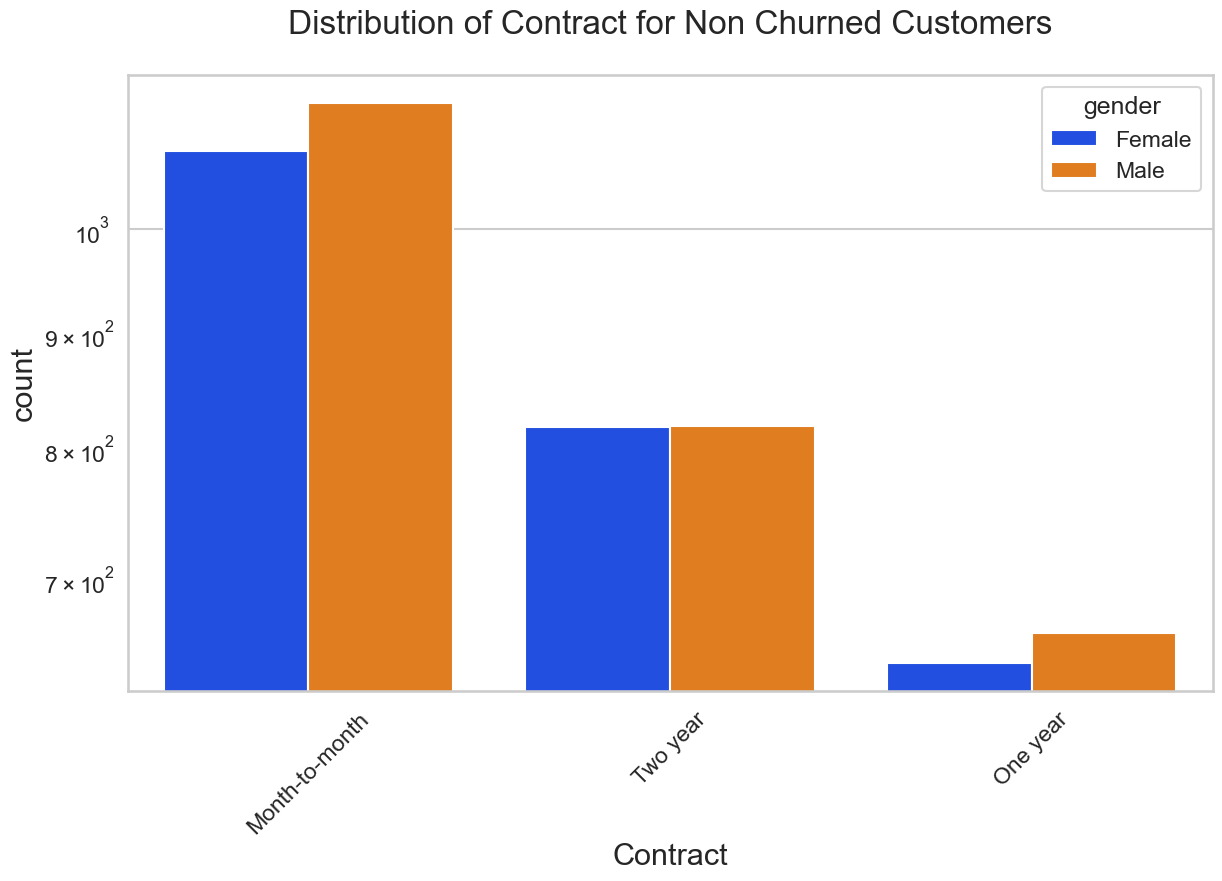

In [202]:
uniplot(new_df1_target0,col='Contract',title='Distribution of Contract for Non Churned Customers',hue='gender')


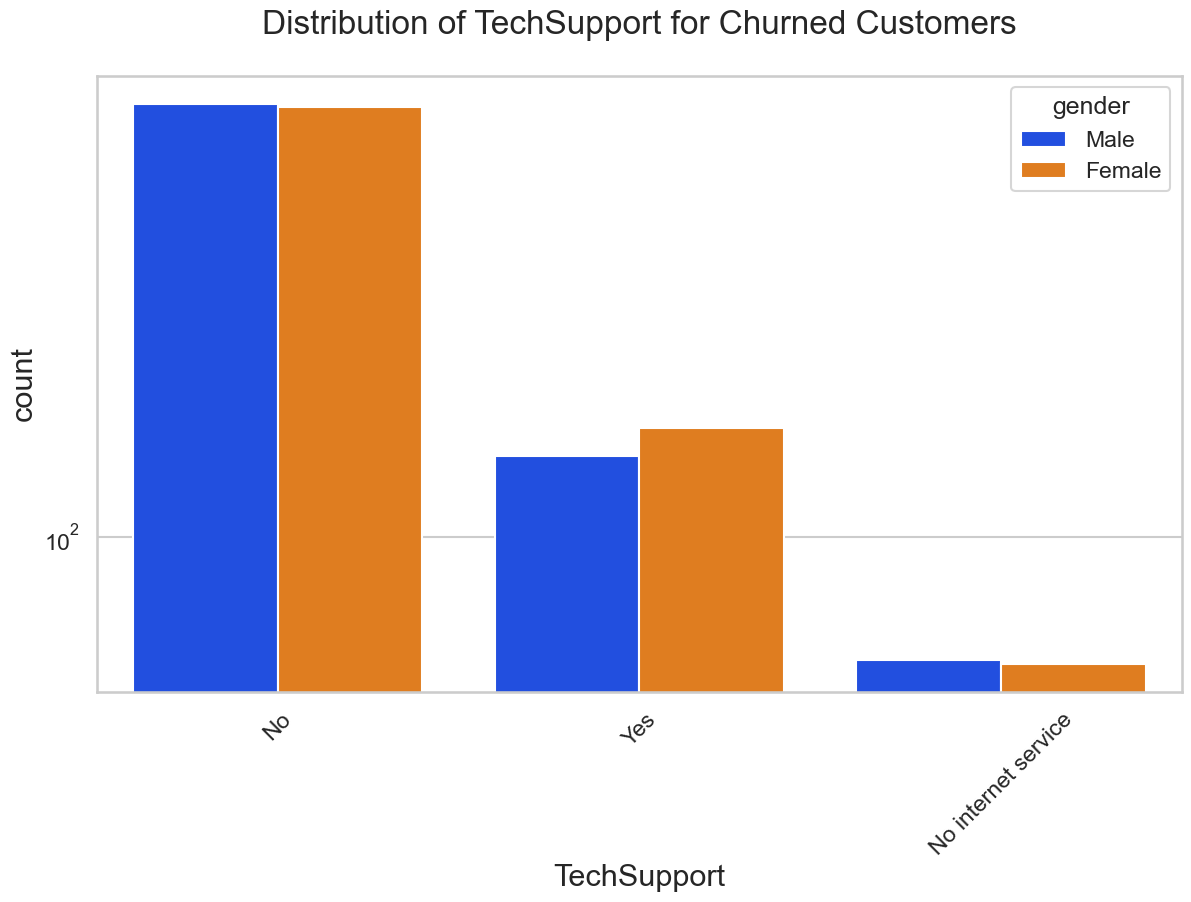

In [203]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

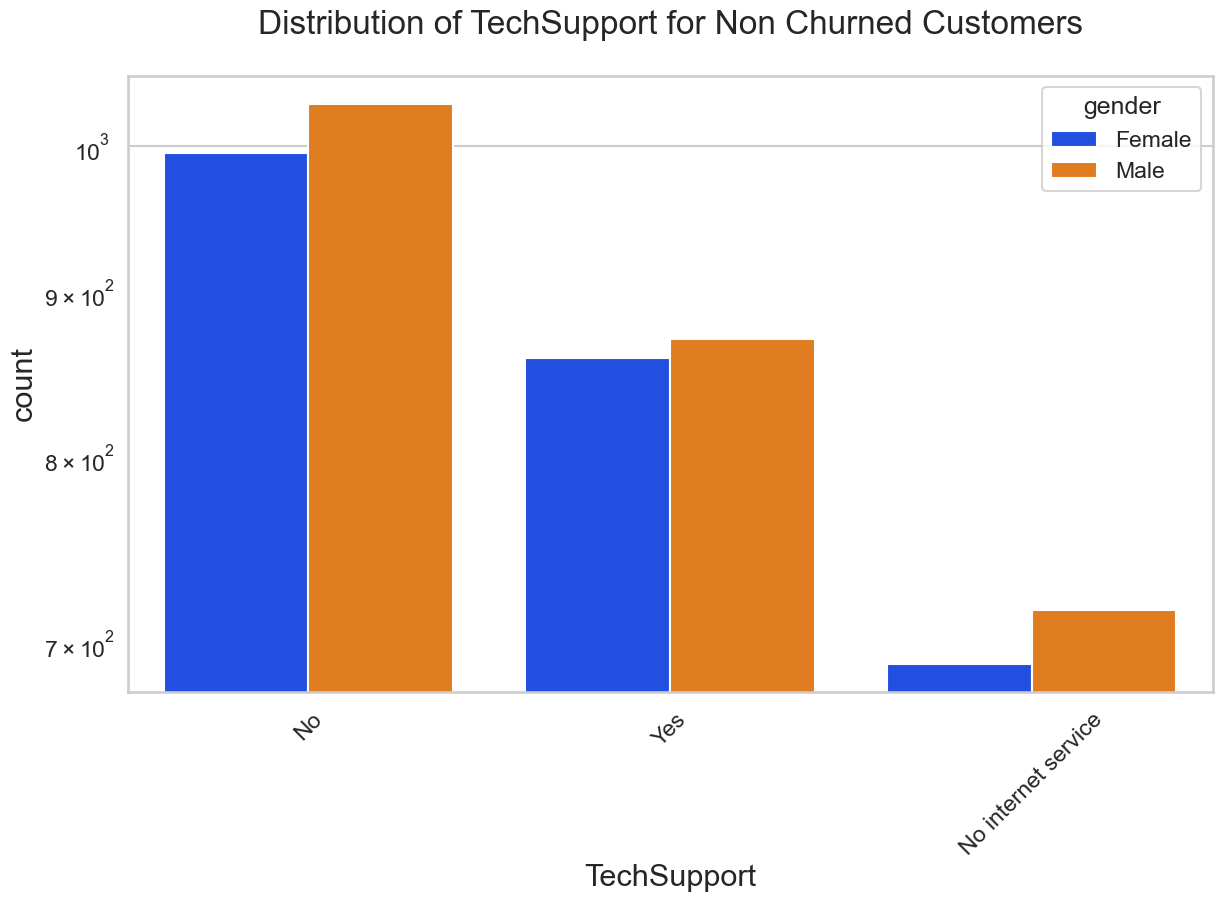

In [204]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of TechSupport for Non Churned Customers',hue='gender')


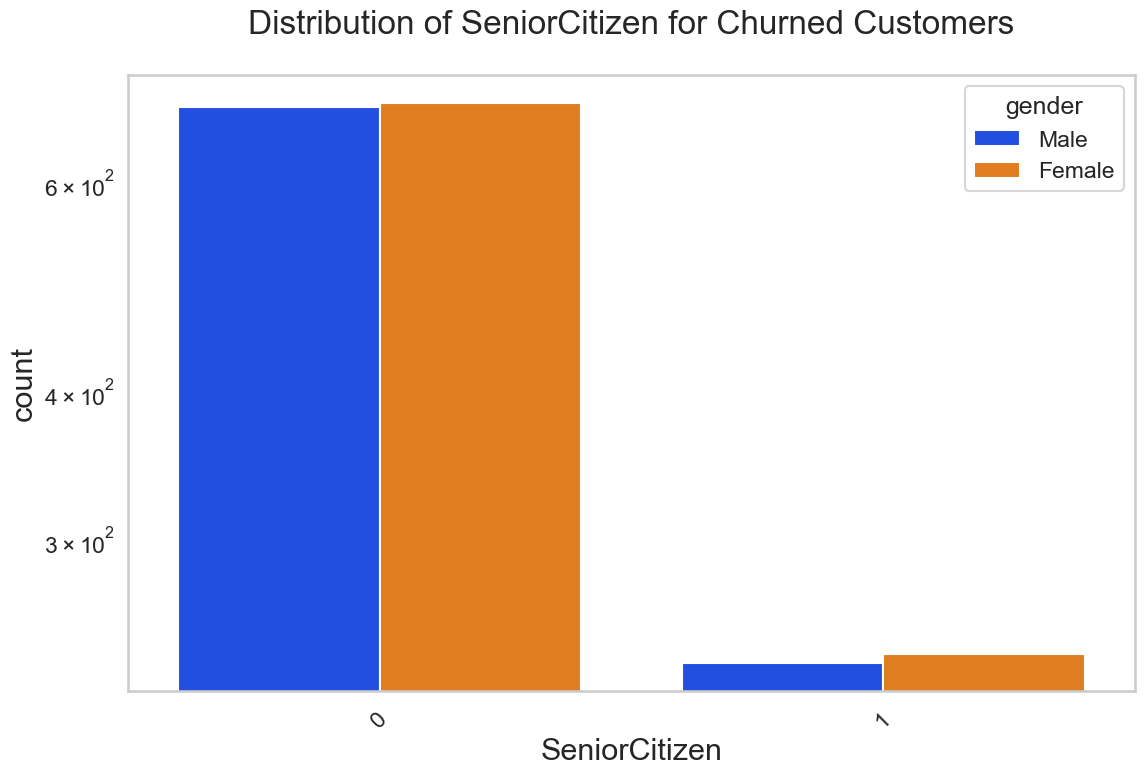

In [205]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

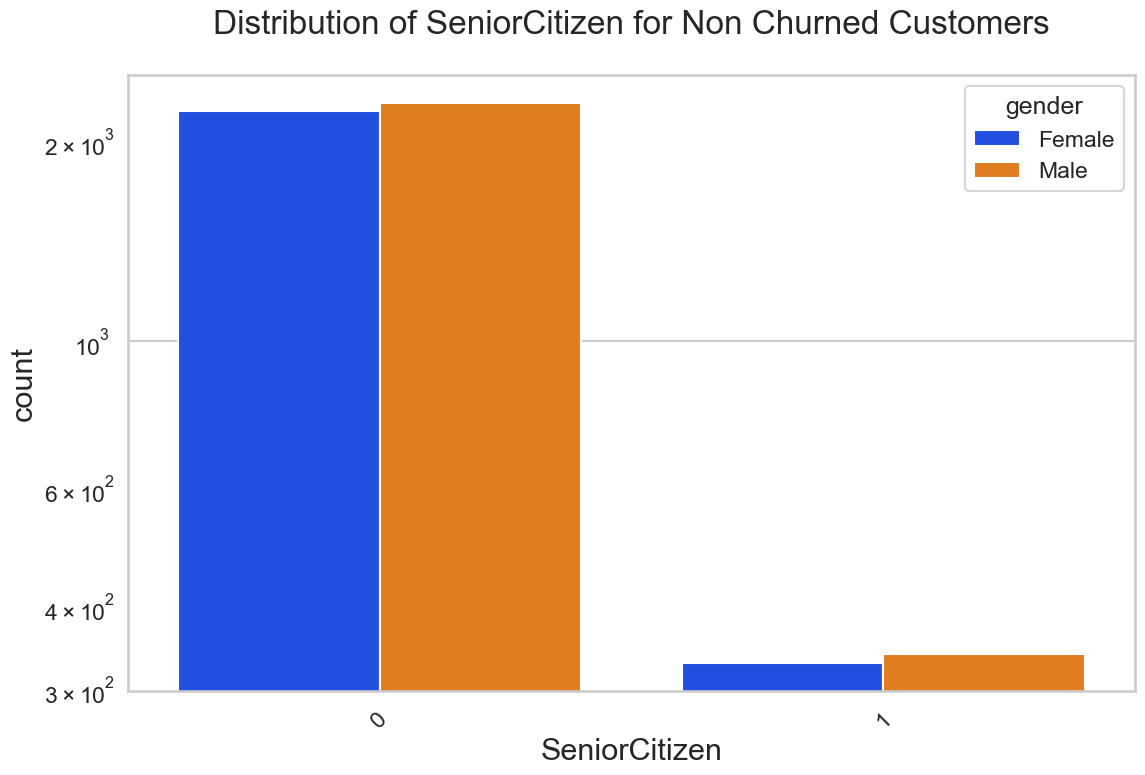

In [206]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of SeniorCitizen for Non Churned Customers',hue='gender')


FINAL CONCLUSIONS:
 >Electronic check medium are the highest churners
 >Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
 >No Online security, No Tech Support category are high churners
 >Non-senior Citizens are high churners

In [207]:
Tel_Churn_dummies.to_csv('tel_churn.csv')